In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split#,cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
housing_data = pd.read_csv("housing.csv")

In [3]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_data['total_bedrooms'] = housing_data['total_bedrooms'].fillna((housing_data['total_bedrooms'].sum())/len(housing_data['total_bedrooms']))


housing_data = housing_data[housing_data['median_house_value'] < (housing_data['median_house_value'].max())]


In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19675 entries, 0 to 20639
Data columns (total 10 columns):
longitude             19675 non-null float64
latitude              19675 non-null float64
housing_median_age    19675 non-null float64
total_rooms           19675 non-null float64
total_bedrooms        19675 non-null float64
population            19675 non-null float64
households            19675 non-null float64
median_income         19675 non-null float64
median_house_value    19675 non-null float64
ocean_proximity       19675 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
class Tree :
    def __init__ (self,X_train,y_train,X_test,y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
    def fit_tree (self,depth):
        dTree = DecisionTreeRegressor(max_depth=depth)
        return dTree.fit(self.X_train,self.y_train)
    
    def predict_tree (self,depth):
        pred = self.fit_tree(depth).predict(self.X_test)
        return pred
    
    def evaluate_tree (self,depth):
        mse = mean_squared_error(self.y_test,self.predict_tree(depth))
        rmse = np.sqrt(mse)
        return rmse
        
        
        
        

In [8]:
housing_train, housing_test = train_test_split(housing_data, test_size=0.33, random_state=11)


In [9]:
lat_income_train = Tree(housing_train[['latitude','median_income']],
                        housing_train[['median_house_value']],
                        housing_train[['latitude','median_income']],
                        housing_train[['median_house_value']])

lat_income_test =  Tree(housing_train[['latitude','median_income']],
                        housing_train[['median_house_value']],
                        housing_test[['latitude','median_income']],
                        housing_test[['median_house_value']])



In [15]:
lat_income_results=pd.DataFrame()
train_results = []
test_results = []
for i in range (1,51):
    train_results.append(lat_income_train.evaluate_tree(i))
    test_results.append(lat_income_test.evaluate_tree(i))


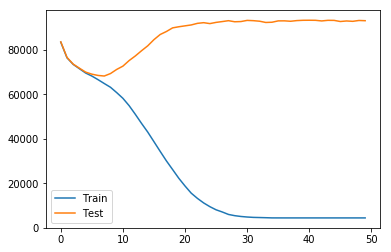

In [20]:
lat_income_results['Train']=(train_results)
lat_income_results['Test']=(test_results)
lat_income_results.plot();